In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

In [2]:
# Dependencies and Setup
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statistics
import os
from matplotlib.ticker import MultipleLocator

In [3]:
# Files to load
city_data_to_load = os.path.join("Resources","city_data.csv")
ride_data_to_load = os.path.join("Resources","ride_data.csv")

In [4]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [6]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [7]:
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [8]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [9]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [10]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [11]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [12]:
# Get the number of datapoints for each city type
city_data_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [13]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [14]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [19]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [21]:
# Get the number of rides for urban cities.

#urban_ride_count = urban_cities_df["city"].value_counts()
urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [22]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]
rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [23]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby("city").mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [24]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]

In [25]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby("city").mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [26]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby("city").mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby("city").mean()["driver_count"]

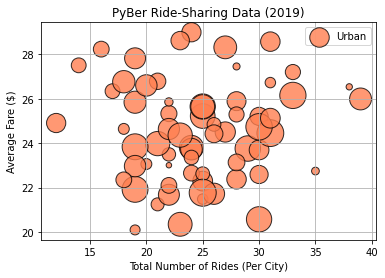

In [27]:
# Build the scatter plots for urban cities.
plt.scatter(
    urban_ride_count,
    urban_avg_fare,
    s=10 * urban_driver_count,
    edgecolors="black",
    linewidths=1,
    alpha=0.8,
    label="Urban",
    c="coral"
)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend.
plt.legend()


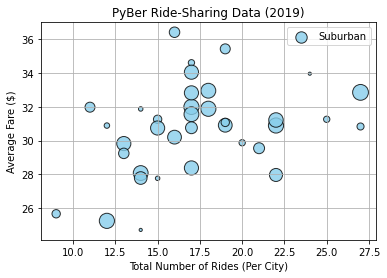

In [28]:
# Build the scatter plots for suburban cities.
plt.scatter(
    suburban_ride_count,
    suburban_avg_fare,
    s=10 * suburban_driver_count,
    edgecolors="black",
    linewidths=1,
    alpha=0.8,
    label="Suburban",
    c="skyblue"
)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend.
plt.legend()

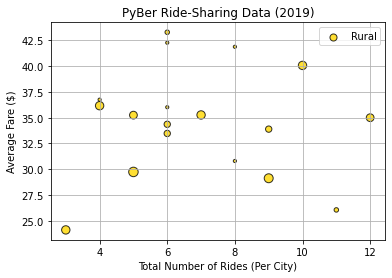

In [29]:
# Build the scatter plots for suburban cities.
plt.scatter(
    rural_ride_count,
    rural_avg_fare,
    s=10 * rural_driver_count,
    edgecolors="black",
    linewidths=1,
    alpha=0.8,
    label="Rural",
    c="gold"
)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend.
plt.legend()

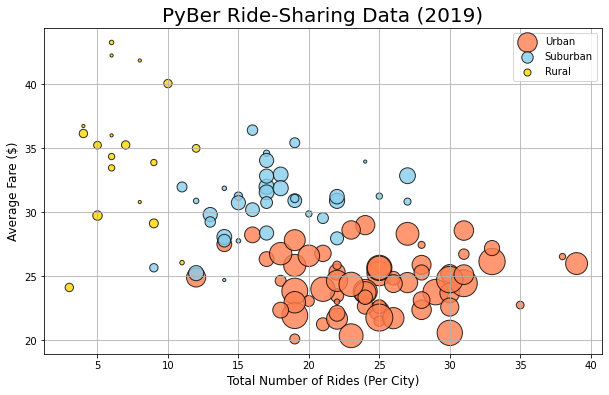

In [30]:
# Build the scatter charts for each city type.

plt.subplots(figsize=(10,6))

plt.scatter(
    urban_ride_count,
    urban_avg_fare,
    s=10 * urban_driver_count,
    edgecolors="black",
    linewidths=1,
    alpha=0.8,
    label="Urban",
    c="coral"
)

plt.scatter(
    suburban_ride_count,
    suburban_avg_fare,
    s=10 * suburban_driver_count,
    edgecolors="black",
    linewidths=1,
    alpha=0.8,
    label="Suburban",
    c="skyblue"
)

plt.scatter(
    rural_ride_count,
    rural_avg_fare,
    s=10 * rural_driver_count,
    edgecolors="black",
    linewidths=1,
    alpha=0.8,
    label="Rural",
    c="gold"
)

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)",fontsize=20)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

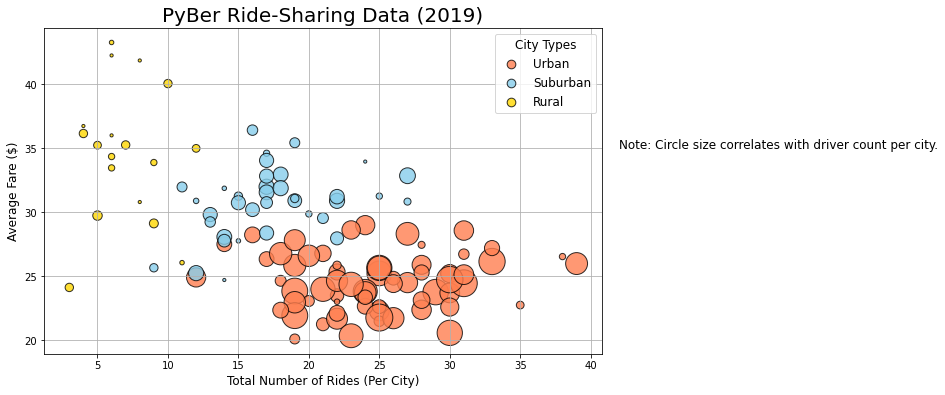

In [31]:
# Create a legend


plt.subplots(figsize=(10,6))

plt.scatter(
    urban_ride_count,
    urban_avg_fare,
    s=10 * urban_driver_count,
    edgecolors="black",
    linewidths=1,
    alpha=0.8,
    label="Urban",
    c="coral"
)

plt.scatter(
    suburban_ride_count,
    suburban_avg_fare,
    s=10 * suburban_driver_count,
    edgecolors="black",
    linewidths=1,
    alpha=0.8,
    label="Suburban",
    c="skyblue"
)

plt.scatter(
    rural_ride_count,
    rural_avg_fare,
    s=10 * rural_driver_count,
    edgecolors="black",
    linewidths=1,
    alpha=0.8,
    label="Rural",
    c="gold"
)

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)",fontsize=20)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.grid(True)

lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1,loc="best",title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize("12")
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("analysis/Fig1.png",bbox_inches="tight")
plt.show()

In [32]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [33]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [34]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [35]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [36]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [37]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [38]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [39]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2),round(suburban_ride_count.median(),2),round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [40]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
Name: ride_id, dtype: int64

In [41]:
suburban_ride_count.mode()

0    17
Name: ride_id, dtype: int64

In [42]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [43]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:,.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:,.2f}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [44]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:,.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count:,.2f}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.00.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [45]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:,.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count:,.2f}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.00.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [46]:
# Get the fares for the urban cities.
urban_fares=urban_cities_df["fare"]
urban_fares

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64

In [47]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares=np.mean(urban_fares)
print(f"The mean fare price for urban trips is {mean_urban_fares:.2f}")

median_urban_fares=np.median(urban_fares)
print(f"The median fare price for urban trips is {median_urban_fares:.2f}")

mode_urban_fares=sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}")


The mean fare price for urban trips is 24.53
The median fare price for urban trips is 24.64
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5]))


In [48]:
suburban_fares=suburban_cities_df["fare"]
suburban_fares

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
        ...  
2245    13.92
2246    12.76
2247    27.70
2248    47.41
2249    17.97
Name: fare, Length: 625, dtype: float64

In [49]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares=np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is {mean_suburban_fares:.2f}")

median_suburban_fares=np.median(suburban_fares)
print(f"The median fare price for suburban trips is {median_suburban_fares:.2f}")

mode_suburban_fares=sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}")

The mean fare price for suburban trips is 30.97
The median fare price for suburban trips is 30.75
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3]))


In [50]:
rural_fares=rural_cities_df["fare"]
rural_fares

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
        ...  
2370    13.38
2371    20.76
2372    11.11
2373    44.94
2374    55.84
Name: fare, Length: 125, dtype: float64

In [51]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_rural_fares=np.mean(rural_fares)
print(f"The mean fare price for rural trips is {mean_rural_fares:.2f}")

median_rural_fares=np.median(rural_fares)
print(f"The median fare price for rural trips is {median_rural_fares:.2f}")

mode_rural_fares=sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}")

The mean fare price for rural trips is 34.62
The median fare price for rural trips is 37.05
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2]))


In [52]:
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [53]:
# Get the drivers for the urban cities.
urban_drivers=urban_cities_df["driver_count"]
print(urban_drivers)

# Calculate the measures of central tendency for the average drivers for the urban cities.
mean_urban_drivers=np.mean(urban_drivers)
print(f"The mean drivers price for urban trips is {mean_urban_drivers:.2f}")

median_urban_drivers=np.median(urban_drivers)
print(f"The median drivers price for urban trips is {median_urban_drivers:.2f}")

mode_urban_drivers=sts.mode(urban_drivers)
print(f"The mode drivers price for urban trips is {mode_urban_drivers}")

suburban_drivers=suburban_cities_df["driver_count"]
print(suburban_drivers)

# Calculate the measures of central tendency for the average drivers for the suburban cities.
mean_suburban_drivers=np.mean(suburban_drivers)
print(f"The mean drivers price for suburban trips is {mean_suburban_drivers:.2f}")

median_suburban_drivers=np.median(suburban_drivers)
print(f"The median drivers price for suburban trips is {median_suburban_drivers:.2f}")

mode_suburban_drivers=sts.mode(suburban_drivers)
print(f"The mode drivers price for suburban trips is {mode_suburban_drivers}")

rural_drivers=rural_cities_df["driver_count"]
print(rural_drivers)

# Calculate the measures of central tendency for the average drivers for the suburban cities.
mean_rural_drivers=np.mean(rural_drivers)
print(f"The mean drivers price for rural trips is {mean_rural_drivers:.2f}")

median_rural_drivers=np.median(rural_drivers)
print(f"The median drivers price for rural trips is {median_rural_drivers:.2f}")

mode_rural_drivers=sts.mode(rural_drivers)
print(f"The mode drivers price for rural trips is {mode_rural_drivers}")

0        5
1       72
2       57
3       34
4       46
        ..
1620    67
1621    41
1622    11
1623     3
1624    57
Name: driver_count, Length: 1625, dtype: int64
The mean drivers price for urban trips is 36.68
The median drivers price for urban trips is 37.00
The mode drivers price for urban trips is ModeResult(mode=array([39]), count=array([86]))
1625    11
1626    20
1627    22
1628    19
1629    12
        ..
2245    12
2246     4
2247    23
2248     5
2249    17
Name: driver_count, Length: 625, dtype: int64
The mean drivers price for suburban trips is 13.71
The median drivers price for suburban trips is 16.00
The mode drivers price for suburban trips is ModeResult(mode=array([20]), count=array([79]))
2250    9
2251    8
2252    6
2253    2
2254    2
       ..
2370    6
2371    2
2372    1
2373    4
2374    1
Name: driver_count, Length: 125, dtype: int64
The mean drivers price for rural trips is 4.30
The median drivers price for rural trips is 4.00
The mode drivers price for r

In [54]:
#Alternate
pyber_data_df.groupby("type").mean()["driver_count"]

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

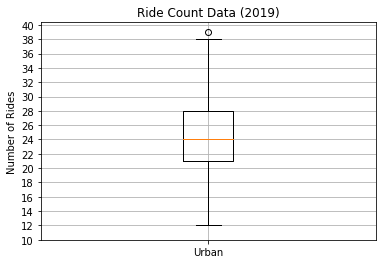

In [55]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]

fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')

ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()


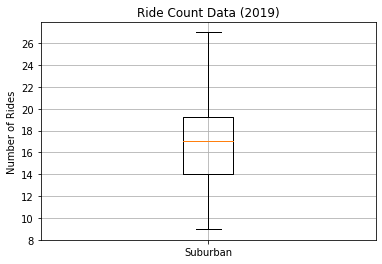

In [56]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Suburban"]

fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')

ax.set_yticks(np.arange(8,28,step=2.0))
ax.grid()
plt.show()

In [57]:
suburban_ride_count.describe()
#median 17
#stdev 3

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [58]:
5.5 * 3 / 4

4.125

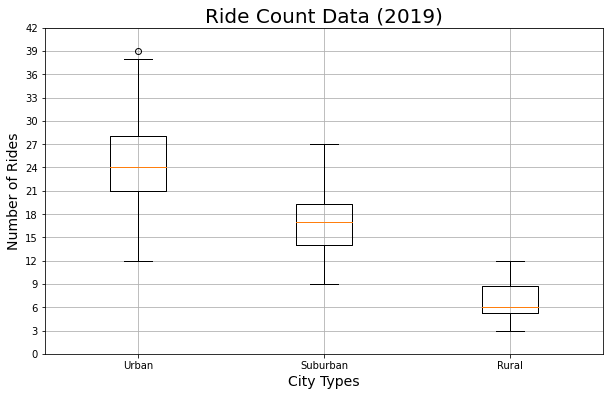

In [59]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data=[urban_ride_count,suburban_ride_count,rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
plt.savefig("analysis/Fig2.png",bbox_inches="tight")
plt.show()


In [60]:
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [61]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]

In [62]:
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


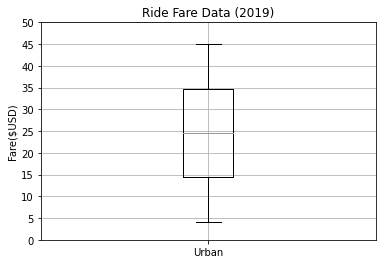

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [63]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

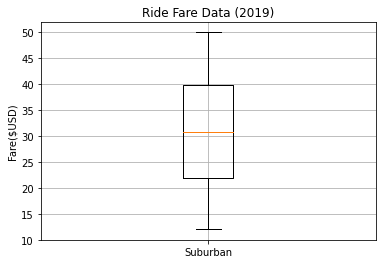

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [64]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(10, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

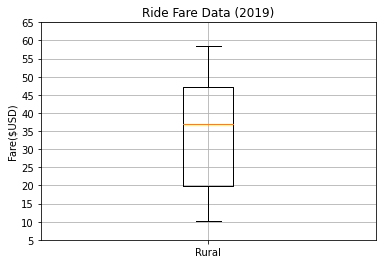

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [65]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 70, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

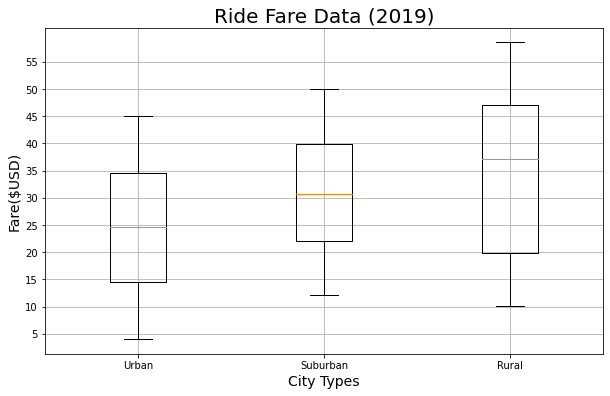

Summary Statistics


In [66]:
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots(figsize=(10,6))
fare_data=[urban_fares,suburban_fares,rural_fares]
ax.boxplot(fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(5, 60, step=5.0))
ax.grid()
plt.savefig("analysis/Fig3.png",bbox_inches="tight")
plt.show()
print("Summary Statistics")

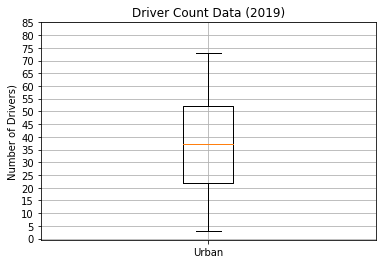

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [67]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

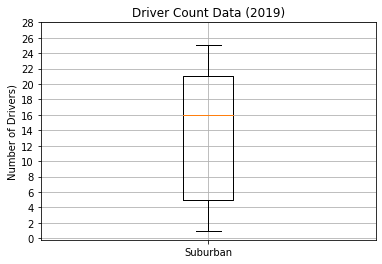

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [68]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

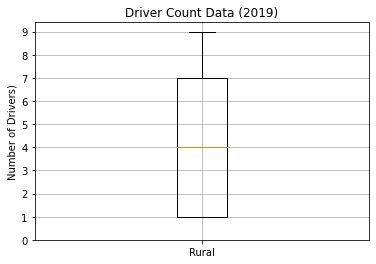

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [69]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 10, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

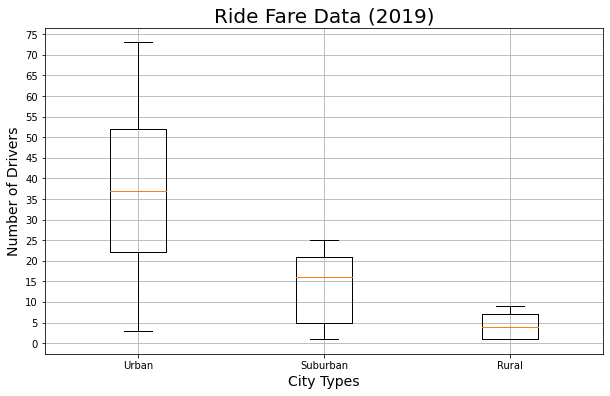

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [71]:
# Create the box-and-whisker plot for the all city type driver count data.
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots(figsize=(10,6))
driver_counts=[urban_drivers,suburban_drivers,rural_drivers]
ax.boxplot(driver_counts,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
plt.savefig("analysis/Fig4.png",bbox_inches="tight")
plt.show()
print("Summary Statistics")
urban_drivers.describe()